In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('food_truck.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
data[data['Profit'] > 24].head()

,Population,Profit
29,22.203,24.147


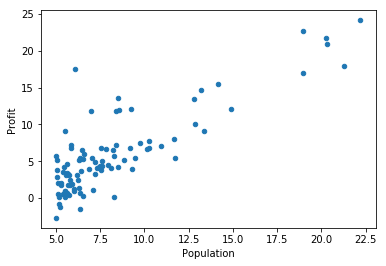

In [6]:
data.plot(x='Population', y='Profit', kind='scatter')

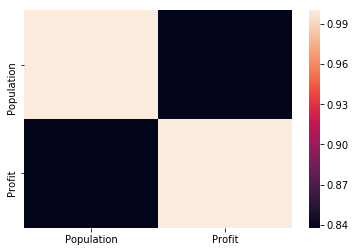

In [7]:
#Seaborn's heatmap version:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [8]:
corr

,Population,Profit
Population,1.000000,0.837873
Profit,0.837873,1.000000


In [9]:
from sklearn import linear_model

In [14]:
model = linear_model.LinearRegression()

In [11]:
data.Population.shape

(97,)

In [12]:
data.shape[1]

2

In [29]:
X = data['Population']
y = data['Profit']

In [17]:
model.fit(X.values.reshape(data.shape[0], 1), y.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
model.coef_

array([1.19303364])

In [19]:
model.intercept_

-3.895780878311852

In [21]:
predict = model.predict(8.2)

In [22]:
predict

array([5.887095])

In [23]:
x = 8.2
result = 1.19303364 * x -3.895780878311852
result

5.887094969688146

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train, test = train_test_split(data, test_size = 0.2, random_state = 42)

In [35]:
train.values.shape

(77, 2)

In [27]:
test.shape

(20, 2)

In [30]:
type(train)

pandas.core.frame.DataFrame

In [28]:
model = linear_model.LinearRegression()

In [39]:
model.fit(train['Population'].values.reshape(train.shape[0], 1), train['Profit'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
model.coef_

array([1.28752876])

In [41]:
model.intercept_

-4.732397595806337

In [45]:
predict = model.predict(test['Population'].values.reshape(test.shape[0], 1))

In [46]:
predict

array([22.66492686,  2.22914165,  2.09845748,  3.54589731,  1.94781662,
        7.84508459, 19.67786014, 10.34198911,  2.62029289,  3.13453187,
        3.75164441,  3.69821196,  2.73707175, 11.78402132,  5.34212868,
        2.81226342,  2.33626404,  2.65029231,  1.78172541,  4.57115646])

In [47]:
#Root-mean-square deviation

In [48]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(test['Profit'], predict)

15.709362447765187